In [1]:
import json
import matplotlib.pyplot as plt

In [2]:
def load_results():
    with open("results_fp32.json") as f:
        fp32 = json.load(f)
    with open("results_fp16.json") as f:
        fp16 = json.load(f)
    with open("results_int8.json") as f:
        int8 = json.load(f)
    with open("results_mixed.json") as f:
        m = json.load(f)
    return {"fp32": fp32, "fp16": fp16, "int8": int8, "m": m}

results = load_results()

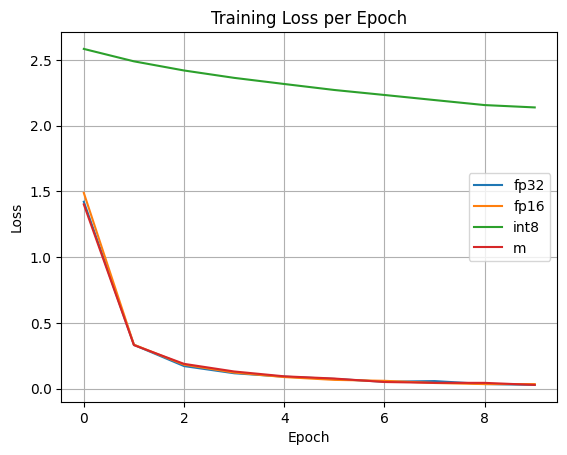

In [3]:
plt.figure()
for name, data in results.items():
    plt.plot(data["epoch_loss"], label=name)
plt.title("Training Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

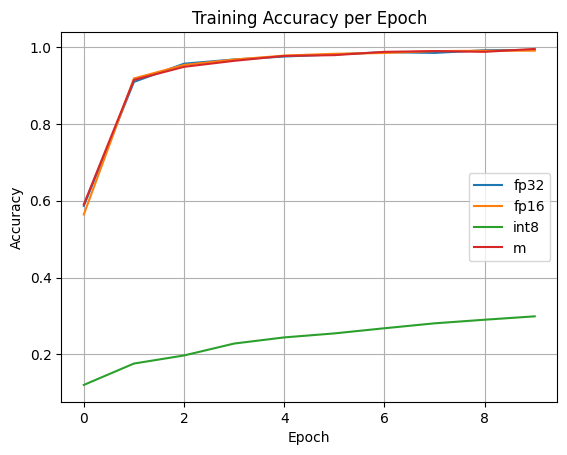

In [4]:
plt.figure()
for name, data in results.items():
    plt.plot(data["epoch_acc"], label=name)
plt.title("Training Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

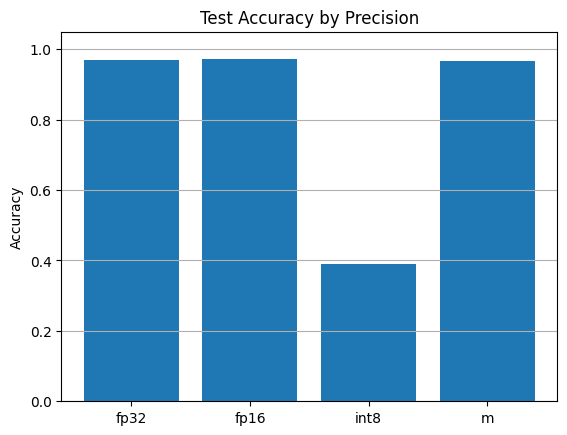

In [5]:
plt.figure()
names = list(results.keys())
test_acc = [results[k]["test_acc"] for k in names]
plt.bar(names, test_acc)
plt.title("Test Accuracy by Precision")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.grid(True, axis='y')
plt.show()

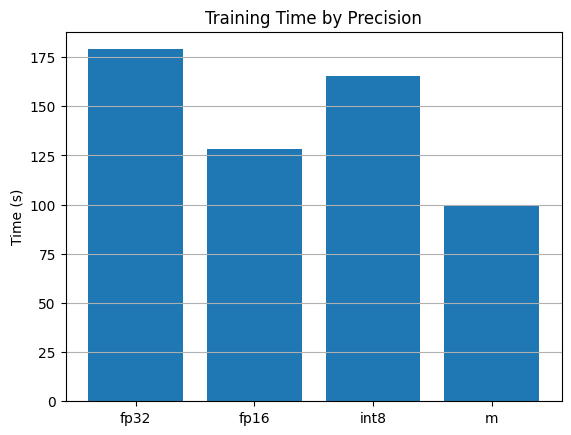

In [6]:
plt.figure()
train_time = [results[k]["train_time"] for k in names]
plt.bar(names, train_time)
plt.title("Training Time by Precision")
plt.ylabel("Time (s)")
plt.grid(True, axis='y')
plt.show()

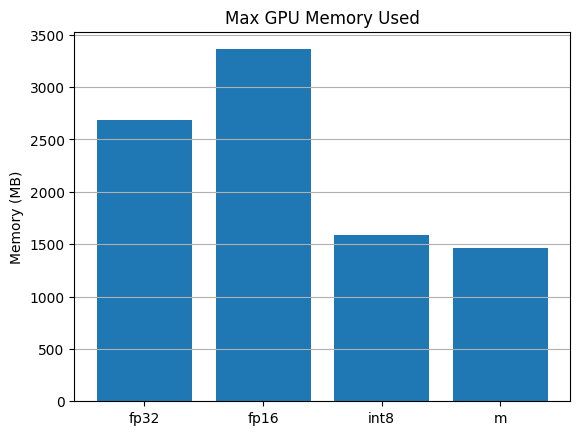

In [7]:
plt.figure()
train_mem = [results[k]["train_mem"] for k in names]
plt.bar(names, train_mem)
plt.title("Max GPU Memory Used")
plt.ylabel("Memory (MB)")
plt.grid(True, axis='y')
plt.show()